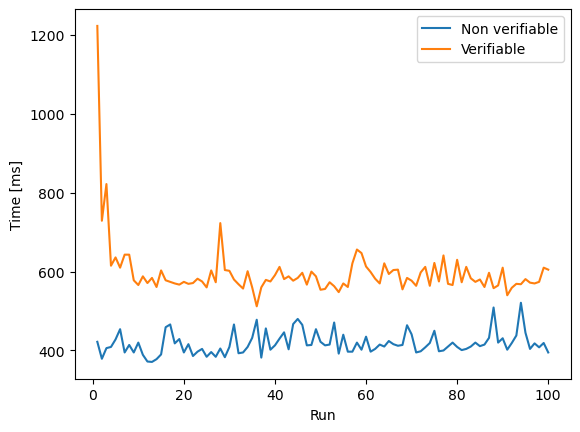

Average increase in length: 42.72%


In [8]:
# Read results_normal.csv and results_safe.csv and compare the results
# The csv contains the following columns: Run,Result
# The Run deignates the number of the run and Result is the time it took in [ms]

import csv
import sys

def read_csv(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader) # skip header
        return {int(row[0]): int(row[1]) for row in csvreader}

# Plot both results on the same graph to see which took longer
def plot_results(results_normal, results_safe):
    import matplotlib.pyplot as plt
    plt.plot(results_normal.keys(), results_normal.values(), label='Non verifiable')
    plt.plot(results_safe.keys(), results_safe.values(), label='Verifiable')
    plt.xlabel('Run')
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.savefig('compilation.png', bbox_inches='tight', dpi=300)
    plt.show()

def print_average_increase_in_length(results_normal, results_safe):
    normal_values = list(results_normal.values())
    safe_values = list(results_safe.values())
    print('Average increase in length: {:.2f}%'.format((sum(safe_values) - sum(normal_values)) / sum(normal_values) * 100))

normal = read_csv('results_normal.csv')
safe = read_csv('results_safe.csv')

plot_results(normal, safe)
print_average_increase_in_length(normal, safe)

In [ ]:
import csv
import sys

def read_csv(filename):
    with open(filename, 'r') as csvfile:
        csvreader = csv.reader(csvfile)
        next(csvreader) # skip header
        return {int(row[0]): int(row[1]) for row in csvreader}

# Plot both results on the same graph to see which took longer
def plot_results(results_unsafe, results_audit):
    import matplotlib.pyplot as plt
    plt.plot(results_unsafe.keys(), results_unsafe.values(), label='No audit ahead of runtime')
    plt.plot(results_audit.keys(), results_audit.values(), label='Audit ahead of runtime')
    plt.xlabel('Run')
    plt.ylabel('Time [ms]')
    plt.legend()
    plt.savefig('execution.png', bbox_inches='tight', dpi=300)
    plt.show()

def print_average_increase_in_length(results_unsafe, results_audit):
    unsafe_values = list(results_unsafe.values())
    audit_values = list(results_audit.values())
    print('Average increase in length: {:.2f}%'.format((sum(audit_values) - sum(unsafe_values)) / sum(unsafe_values) * 100))

unsafe = read_csv('results_unsafe.csv')
audit = read_csv('results_audit.csv')

plot_results(unsafe, audit)
print_average_increase_in_length(unsafe, audit)